In [1]:
import os
import requests
import csv
import json
import datetime
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def draw_pie(data,index):

    # Create a pie chart
    plt.pie(
        # using count of subsections
        data,
        # with the labels being names
        labels=index,
        # with no shadows
        shadow=False,
        # with the start angle at 80%
        startangle=80,
        # with the percent listed as a fraction
        autopct='%1.1f%%',
        )

In [3]:
r = requests.get('https://api.github.com/events')
my_params= {'api-key': os.environ['api_key'],'fq': "section_name:(\"Sports\")", 'begin_date': "20100101",'end_date': "20170330",'sort': "newest",'page': 100}
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
temp = requests.get(url,params=my_params)
resp  =temp.json()['response']
df = pd.DataFrame(resp['docs'])
df['year']=map(lambda x:x[:4],df['pub_date'].values)
count=0
for year in df['year'].unique():
    plt.figure(count)
    count = count+1
    groupby_subsection = df.groupby(['year','subsection_name']).count()['_id']
    index = [j for i,j in groupby_subsection.index.tolist()]
draw_pie(groupby_subsection, index)

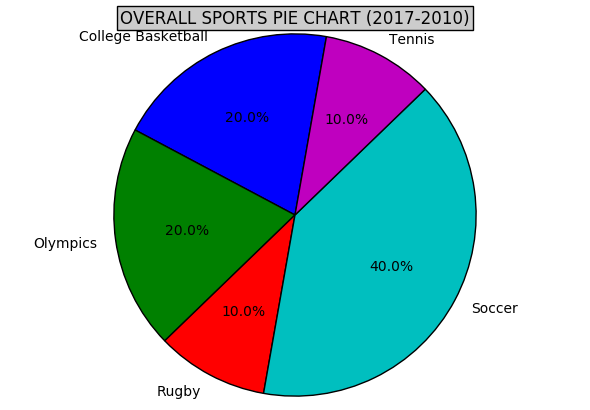

In [4]:
    # View the plot drop above
    plt.axis('equal')
    # View the plot
    plt.tight_layout()
    plt.title('OVERALL SPORTS PIE CHART (2017-2010)', bbox={'facecolor':'0.8', 'pad':2})
    plt.show()